# Neural Networks From Scratch

## Initialization

In [25]:
import nnfs
import matplotlib.pyplot as plt

# https://cs231n.github.io/neural-networks-case-study/
from nnfs.datasets import spiral_data

from src.Accuracy.AccuracyCategorical import AccuracyCategorical
from src.Activation.ActivationReLU import ActivationReLU
from src.Activation.ActivationSoftmax import ActivationSoftmax
from src.Layer.LayerDense import LayerDense
from src.Layer.LayerDropout import LayerDropout
from src.Loss.LossCategoricalCrossEntropy import LossCategoricalCrossEntropy
from src.Model.Model import Model
from src.Optimizer.OptimizerAdam import OptimizerAdam


# Fixed random seeds make data consistent
nnfs.init()

## Create dataset

X is XY coordinate arrays, y is features.

In [26]:
X, y = spiral_data(samples=1000, classes=3)
X_test, y_test = spiral_data(samples=100, classes=3)

## Draw dataset

We hope to train a model that can predict which of the three categories a point belongs to for a given point in the XY coordinate system.

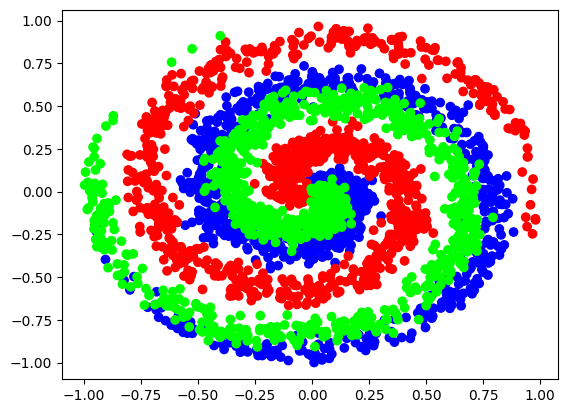

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

## Instantiate the model

In [28]:
model = Model()

## Add layers

In [29]:
model.add(
    LayerDense(2, 512, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(ActivationReLU())
model.add(LayerDropout(0.1))
model.add(LayerDense(512, 3))
model.add(ActivationSoftmax())

## Set loss, optimizer and accuracy objects

In [30]:
model.set(
    loss=LossCategoricalCrossEntropy(),
    optimizer=OptimizerAdam(learning_rate=0.05, decay=5e-5),
    accuracy=AccuracyCategorical()
)

## Finalize the model

In [31]:
model.finalize()

## Train the model

You can set `epochs` and `print_every` to determine how many times to train.

In [32]:
# train 10000 / 100 = 100 times
model.train(X, y, validation_data=(X_test, y_test), epochs=10000,
            print_every=100)

epoch: 100, acc: 0.720, loss: 0.719 (data_loss: 0.658, reg_loss: 0.061), lr: 0.04975371909050202
epoch: 200, acc: 0.788, loss: 0.609 (data_loss: 0.530, reg_loss: 0.079), lr: 0.049507401356502806
epoch: 300, acc: 0.796, loss: 0.594 (data_loss: 0.513, reg_loss: 0.080), lr: 0.0492635105177595
epoch: 400, acc: 0.831, loss: 0.536 (data_loss: 0.456, reg_loss: 0.080), lr: 0.04902201088288642
epoch: 500, acc: 0.823, loss: 0.528 (data_loss: 0.447, reg_loss: 0.082), lr: 0.048782867456949125
epoch: 600, acc: 0.830, loss: 0.515 (data_loss: 0.438, reg_loss: 0.077), lr: 0.04854604592455945
epoch: 700, acc: 0.822, loss: 0.560 (data_loss: 0.486, reg_loss: 0.074), lr: 0.048311512633460556
epoch: 800, acc: 0.847, loss: 0.478 (data_loss: 0.403, reg_loss: 0.075), lr: 0.04807923457858551
epoch: 900, acc: 0.840, loss: 0.506 (data_loss: 0.435, reg_loss: 0.070), lr: 0.04784917938657352
epoch: 1000, acc: 0.845, loss: 0.476 (data_loss: 0.405, reg_loss: 0.071), lr: 0.04762131530072861
epoch: 1100, acc: 0.850, lo